In [1]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.patches as mpatches
import os
import glob
import json
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
from scipy import stats

In [2]:
plt.rcParams.update({'font.size': 12, 'axes.grid':True, 'grid.linewidth':0.3})


In [3]:
path = '../../results/predictions/national/vaccination_study_2/'

In [4]:
## Update data
# url = 'https://epistat.sciensano.be/Data/COVID19BE.xlsx'
# df = pd.read_excel(url, sheet_name="HOSP")
# df.to_csv(path+'COVID19BE_HOSP.csv', index=False)

In [5]:
data = pd.read_csv(path+'COVID19BE_HOSP.csv', parse_dates=['DATE'])
data = data.set_index('DATE')
hosp_data = data.resample('D').sum().reset_index()

In [6]:
simulations = pd.read_csv(path+'simulations.csv', parse_dates=['Date'])

In [7]:
def plot_model(ax, data, line_col, LL_col, UL_col, color, label):
    ax.plot(data.Date,data[line_col], c=color, label=label)
    ax.fill_between(data.Date, data[LL_col], data[UL_col], 
                    alpha=0.2, facecolor=color)
    return

<IPython.core.display.Javascript object>


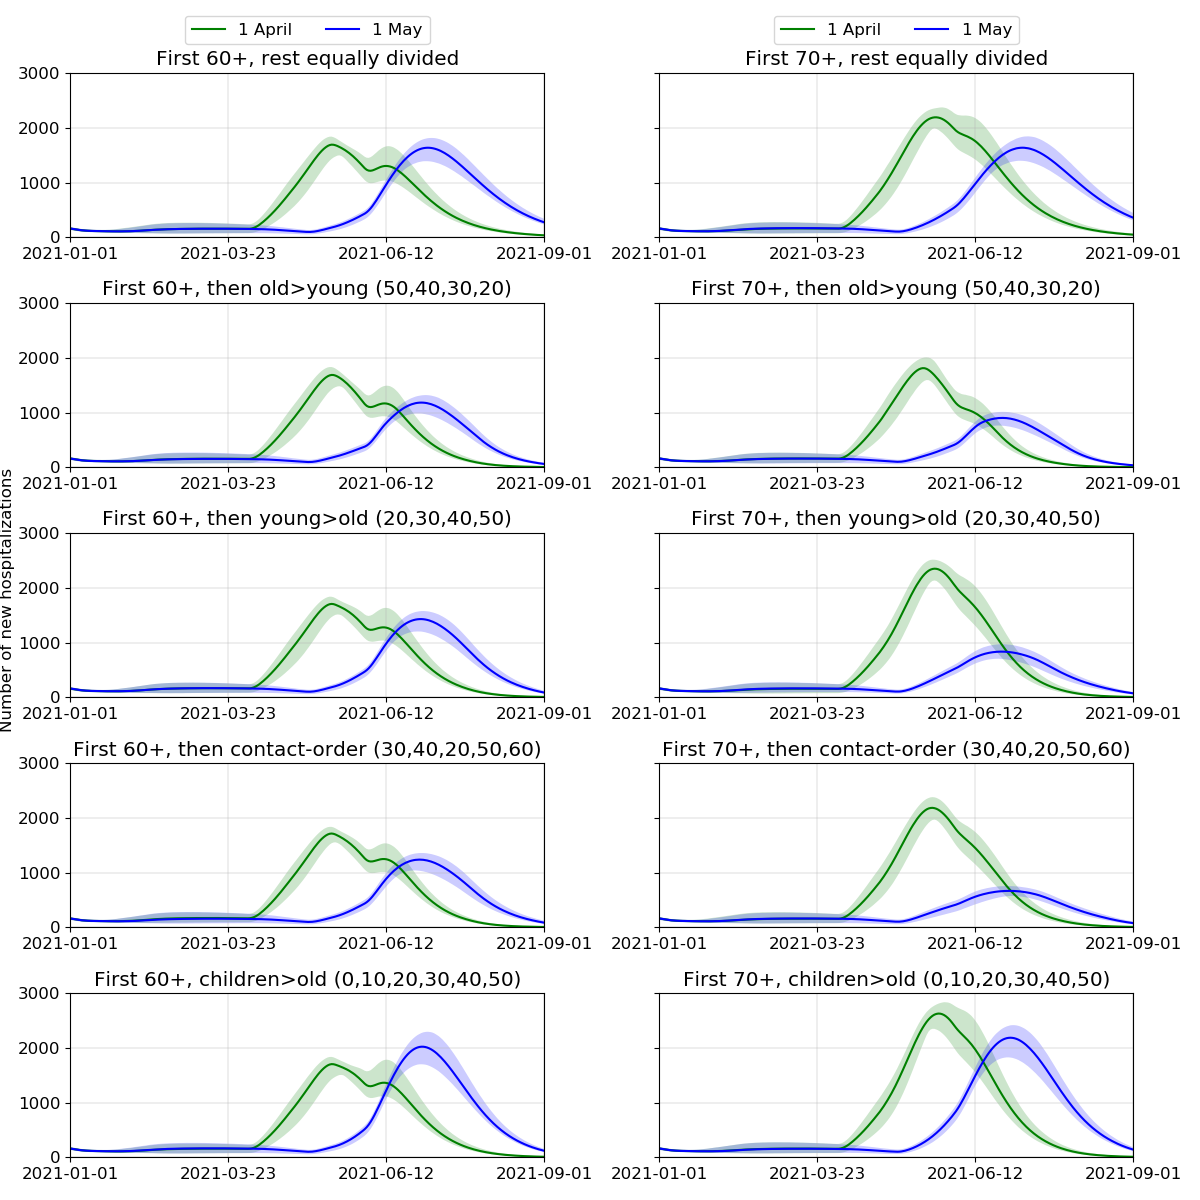

In [8]:
fig,ax = plt.subplots(figsize=(12,12),nrows=5, ncols=2, sharex=True, sharey=True)

for axh, scen in zip(range(5),['a','b','c','d','e']):
    plot_model(ax[axh,0], simulations, 'S1'+scen+'_incidences_mean', 'S1'+scen+'_incidences_LL', 'S1'+scen+'_incidences_UL', 'green', '1 April')
    plot_model(ax[axh,0], simulations, 'S2'+scen+'_incidences_mean', 'S2'+scen+'_incidences_LL', 'S2'+scen+'_incidences_UL', 'blue', '1 May')
    ax[axh,0].xaxis.set_tick_params(which='both', labelbottom=True)

for axh, scen in zip(range(5),['a','b','c','d','e']):
    plot_model(ax[axh,1], simulations, 'S3'+scen+'_incidences_mean', 'S3'+scen+'_incidences_LL', 'S3'+scen+'_incidences_UL', 'green', '1 April')
    plot_model(ax[axh,1], simulations, 'S4'+scen+'_incidences_mean', 'S4'+scen+'_incidences_LL', 'S4'+scen+'_incidences_UL', 'blue', '1 May')
    ax[axh,1].xaxis.set_tick_params(which='both', labelbottom=True)
    
ax[0,0].set_xlim(pd.Timestamp('2021-01-01'), pd.Timestamp('2021-09-01'))
ax[0,0].set_xticks(pd.date_range('2021-01-01', '2021-09-01', periods=4))
fig.text(0, 0.5, 'Number of new hospitalizations', va='center', rotation='vertical')
ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2)
ax[0,1].legend(loc='upper center', bbox_to_anchor=(0.5, 1.4), ncol=2)
ax[0,0].set_ylim(0,3000)

ax[0,0].set_title('First 60+, rest equally divided')
ax[0,1].set_title('First 70+, rest equally divided')
ax[1,0].set_title('First 60+, then old>young (50,40,30,20)')
ax[1,1].set_title('First 70+, then old>young (50,40,30,20)')
ax[2,0].set_title('First 60+, then young>old (20,30,40,50)')
ax[2,1].set_title('First 70+, then young>old (20,30,40,50)')
ax[3,0].set_title('First 60+, then contact-order (30,40,20,50,60)')
ax[3,1].set_title('First 70+, then contact-order (30,40,20,50,60)')
ax[4,0].set_title('First 60+, children>old (0,10,20,30,40,50)')
ax[4,1].set_title('First 70+, children>old (0,10,20,30,40,50)')

fig.tight_layout()
fig.savefig(path+'Compare_opening_dates.png', dpi=400)

<IPython.core.display.Javascript object>


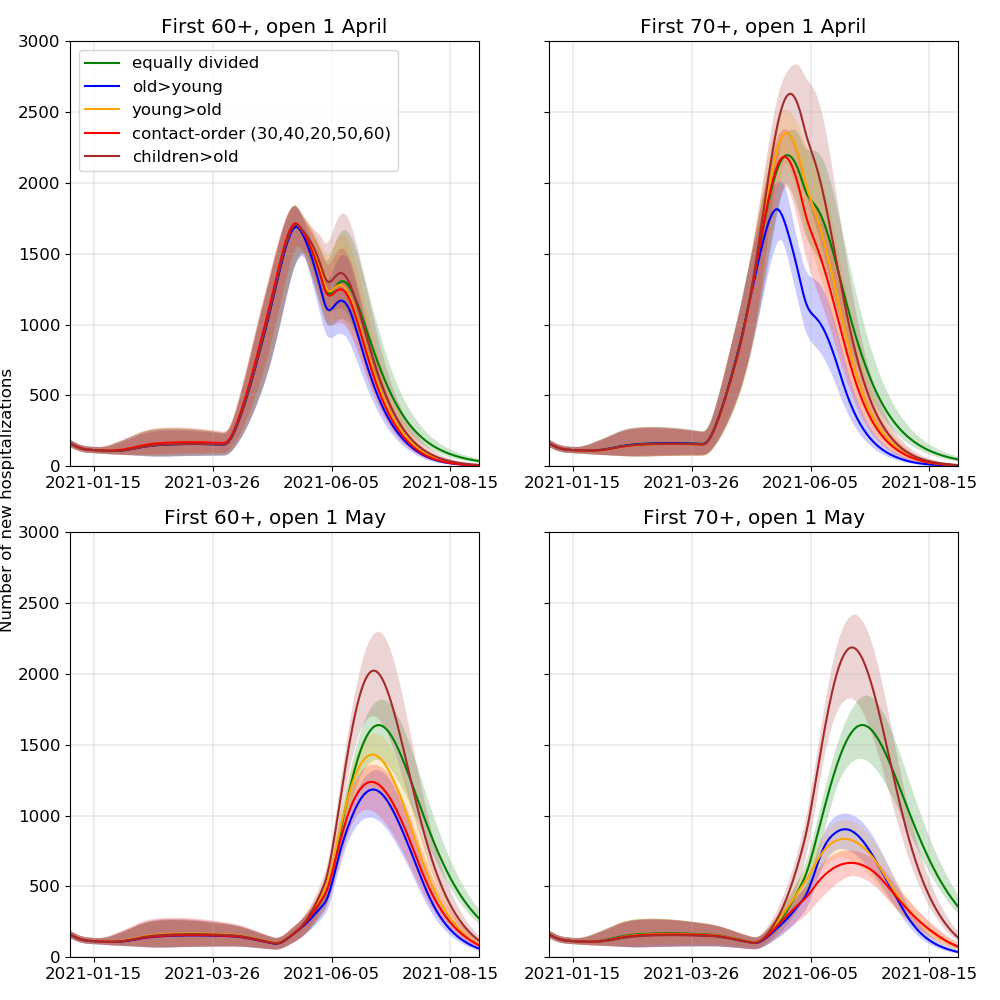

In [10]:
fig,ax = plt.subplots(figsize=(10,10),nrows=2, ncols=2, sharex=True, sharey=True)
legends=['equally divided', 
        'old>young', 
        'young>old',
        'contact-order (30,40,20,50,60)',
        'children>old']

for S,axl,axr in zip(['1','3','2','4'],[0,0,1,1],[0,1,0,1]):
    for scen,col,leg in zip(['a','b','c','d','e'],['green','blue','orange','red', 'brown'],legends):
        plot_model(ax[axl,axr], simulations, 'S'+S+scen+'_incidences_mean', 'S'+S+scen+'_incidences_LL', 'S'+S+scen+'_incidences_UL', col, leg)
    ax[axl,axr].xaxis.set_tick_params(which='both', labelbottom=True)

#ax[0,0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=1)
ax[0,0].legend(loc='upper left')

ax[0,0].set_title('First 60+, open 1 April')
ax[0,1].set_title('First 70+, open 1 April')
ax[1,0].set_title('First 60+, open 1 May')
ax[1,1].set_title('First 70+, open 1 May')

ax[0,0].set_xlim(pd.Timestamp('2021-01-01'), pd.Timestamp('2021-09-01'))
ax[0,0].set_xticks(pd.date_range('2021-01-15', '2021-08-15', periods=4))
fig.text(0, 0.5, 'Number of new hospitalizations', va='center', rotation='vertical')
ax[0,0].set_ylim(0,3000)

fig.tight_layout()

fig.savefig(path+'Compare_vacc_orders.png', dpi=400)

Conclusies:
- als je al opent 1 april: 
    - als je eerste alle 60+ vaccineert doet verdere volgorde er niet meer toe
    - als je maar tot 70+ gaat als prioritaire, moet je toch best in volgorde van oud > jong gaan, dus komen 60+-ers opnieuw prioritair
- als je pas opent in mei: best in volgorde van contacten na 70+-ers (dus niet 60+-ers prioritair zetten)
